<a href="https://colab.research.google.com/github/janerysn/J-Data-Science/blob/main/SPK_Pemilihan%20Rekomendasi%20Buku%20Self-Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sistem Pendukung Keputusan Pemilihan Rekomendasi Buku Self-Improvement.**
Oleh: Zahra Jane Arnecia

# **Langkah-Langkah Pengerjaan : <br>**
# **1. Menampilkan Dataset**



In [ ]:
import pandas as pd
import numpy as np

# Dataset books_self_improvement_dataset
data = {
    'nama_buku': [
        'Atomic Habit',
        'The 7 Habits of Highly Effective People',
        'How to Win Friends and Influence People',
        'Think and Grow Rich',
        'The Power of Now',
        '48 Laws of Power',
        'Who Moved My Cheese',
        'Thinking, Fast and Slow',
        'Deep Work'
    ],
    'rating_buku': [4.8, 4.8, 4.6, 4.8, 4.7, 4.7, 4.6, 4.6, 4.6],
    'jumlah_halaman': [320, 810, 320, 388, 280, 452, 96, 512, 304],
    'best_seller': [1, 0, 0, 0, 1, 1, 1, 1, 0],
    'harga_buku': [27.00, 32.99, 29.52, 23.71, 26.95, 40.00, 27.00, 38.00, 29.00],
    'jumlah_ulasan_pembaca': [133.813, 13.844, 78.896, 7.375, 62.028, 80.504, 27.526, 44.87, 32.921],

}

df = pd.DataFrame(data)
df

,nama_buku,rating_buku,jumlah_halaman,best_seller,harga_buku,jumlah_ulasan_pembaca
0,Atomic Habit,4.8,320,1,27.00,133.813
1,The 7 Habits of Highly Effective People,4.8,810,0,32.99,13.844
2,How to Win Friends and Influence People,4.6,320,0,29.52,78.896
3,Think and Grow Rich,4.8,388,0,23.71,7.375
4,The Power of Now,4.7,280,1,26.95,62.028
5,48 Laws of Power,4.7,452,1,40.00,80.504
6,Who Moved My Cheese,4.6,96,1,27.00,27.526
7,"Thinking, Fast and Slow",4.6,512,1,38.00,44.870
8,Deep Work,4.6,304,0,29.00,32.921


# **2. Membuat Tabel Alternatif dan Kriteria**

In [ ]:
# Menambahkan indeks A1 - A9 untuk setiap baris
df.index = [f"A{i+1}" for i in range(len(df))]

# Penamaan Kolom
df.columns = ["Nama Buku", "C1", "C2", "C3", "C4", "C5"]

# Memindahkan indeks ke dalam kolom baru bernama "Alternatif"
df = df.reset_index()
df.rename(columns={'index': 'Alternatif'}, inplace=True)

df

,Alternatif,Nama Buku,C1,C2,C3,C4,C5
0,A1,Atomic Habit,4.8,320,1,27.00,133.813
1,A2,The 7 Habits of Highly Effective People,4.8,810,0,32.99,13.844
2,A3,How to Win Friends and Influence People,4.6,320,0,29.52,78.896
3,A4,Think and Grow Rich,4.8,388,0,23.71,7.375
4,A5,The Power of Now,4.7,280,1,26.95,62.028
5,A6,48 Laws of Power,4.7,452,1,40.00,80.504
6,A7,Who Moved My Cheese,4.6,96,1,27.00,27.526
7,A8,"Thinking, Fast and Slow",4.6,512,1,38.00,44.870
8,A9,Deep Work,4.6,304,0,29.00,32.921


# **3. Memberikan Bobot Kriteria**

In [ ]:
# Memberikan Bobot Kriteria
weights = np.array([0.3, 0.2, 0.1, 0.2, 0.2])

df_weights = pd.DataFrame({
    'Kriteria': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'Bobot': weights
})

print("Bobot Kriteria:")
df_weights

Bobot Kriteria:


,Kriteria,Bobot
0,C1,0.3
1,C2,0.2
2,C3,0.1
3,C4,0.2
4,C5,0.2


# **4. Melakukan Normalisasi Matriks ('R) <br>**
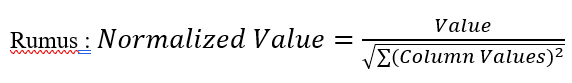

In [ ]:
# Menghitung Matriks normalisasi R'
R = df[["C1", "C2", "C3", "C4", "C5"]] / np.sqrt((df[["C1", "C2", "C3", "C4", "C5"]] ** 2).sum())

print("Matriks Ternormalisasi:")
R

Matriks Ternormalisasi:


,C1,C2,C3,C4,C5
0,0.341173,0.248524,0.447214,0.291297,0.681446
1,0.341173,0.629075,0.000000,0.355922,0.070501
2,0.326957,0.248524,0.000000,0.318485,0.401780
3,0.341173,0.301335,0.000000,0.255802,0.037557
4,0.334065,0.217458,0.447214,0.290757,0.315879
5,0.334065,0.351040,0.447214,0.431551,0.409969
6,0.326957,0.074557,0.447214,0.291297,0.140177
7,0.326957,0.397638,0.447214,0.409973,0.228502
8,0.326957,0.236097,0.000000,0.312874,0.167651


# **5. Menghitung Matriks Ternormalisasi Terbobot <br>**
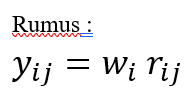

In [ ]:
# Mengalikan matriks normalisasi dengan bobot Y
Y = R * weights

print("Matriks Normalisasi Terbobot:")
Y

Matriks Normalisasi Terbobot:


,C1,C2,C3,C4,C5
0,0.102352,0.049705,0.044721,0.058259,0.136289
1,0.102352,0.125815,0.000000,0.071184,0.014100
2,0.098087,0.049705,0.000000,0.063697,0.080356
3,0.102352,0.060267,0.000000,0.051160,0.007511
4,0.100220,0.043492,0.044721,0.058151,0.063176
5,0.100220,0.070208,0.044721,0.086310,0.081994
6,0.098087,0.014911,0.044721,0.058259,0.028035
7,0.098087,0.079528,0.044721,0.081995,0.045700
8,0.098087,0.047219,0.000000,0.062575,0.033530


# **6. Membuat Solusi Positif (A+) dan Solusi Negatif (A-)**

In [ ]:
# Nilai ideal positif (A+)
A_positif = [
    Y.max()[0],  # C1 (Benefit)
    Y.max()[1],  # C2 (Benefit)
    Y.max()[2],  # C3 (Benefit)
    Y.min()[3],  # C4 (Cost)
    Y.max()[4]   # C5 (Benefit)
]

# Nilai ideal negatif (A-)
A_negatif = [
    Y.min()[0],  # C1 (Benefit)
    Y.min()[1],  # C2 (Benefit)
    Y.min()[2],  # C3 (Benefit)
    Y.max()[3],  # C4 (Cost)
    Y.min()[4]   # C5 (Benefit)
]

<ipython-input-16-d9943b17f35a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y.max()[0],  # C1 (Benefit)
<ipython-input-16-d9943b17f35a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y.max()[1],  # C2 (Benefit)
<ipython-input-16-d9943b17f35a>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y.max()[2],  # C3 (Benefit)
<ipython-input-16-d9943b17f35a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

In [ ]:
# Menampilkan A+ dan A- bersama serta kriteria
df_A = pd.DataFrame({
    'Kriteria': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'Ideal Positif (A+)': A_positif,
    'Ideal Negatif (A-)': A_negatif
})

df_A

,Kriteria,Ideal Positif (A+),Ideal Negatif (A-)
0,C1,0.102352,0.098087
1,C2,0.125815,0.014911
2,C3,0.044721,0.000000
3,C4,0.051160,0.086310
4,C5,0.136289,0.007511


# **7. Menghitung Jarak Ideal ke Positif (D+) dan Jarak Ideal ke Negatif (D-)<br>**
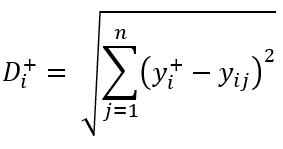 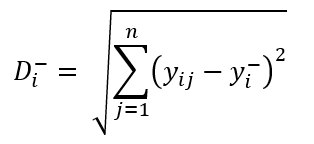

In [ ]:
# Menghitungan jarak (D+ dan D-)
D_positif = np.sqrt(((Y - A_positif) ** 2).sum(axis=1))
D_negatif = np.sqrt(((Y - A_negatif) ** 2).sum(axis=1))

df_D = pd.DataFrame({
    'Alternatif': [f"A{i+1}" for i in range(len(D_plus))],
    'D+': D_positif,
    'D-': D_negatif
})

df_D

,Alternatif,D+,D-
0,A1,0.076441,0.143525
1,A2,0.131648,0.112205
2,A3,0.105341,0.083835
3,A4,0.151262,0.057540
4,A5,0.110346,0.081932
5,A6,0.085324,0.103004
6,A7,0.155200,0.056640
7,A8,0.106385,0.087477
8,A9,0.137423,0.047793


# **8. Menghitung Nilai Preferensi<br>**
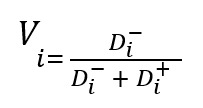

In [ ]:
# Menghitung nilai preferensi
P = D_negatif / (D_positif + D_negatif)

# Menambahkan nilai preferensi ke DataFrame
df['Preference'] = P

df

,Alternatif,Nama Buku,C1,C2,C3,C4,C5,Preference
0,A1,Atomic Habit,4.8,320,1,27.00,133.813,0.652487
1,A2,The 7 Habits of Highly Effective People,4.8,810,0,32.99,13.844,0.460135
2,A3,How to Win Friends and Influence People,4.6,320,0,29.52,78.896,0.443158
3,A4,Think and Grow Rich,4.8,388,0,23.71,7.375,0.275571
4,A5,The Power of Now,4.7,280,1,26.95,62.028,0.426112
5,A6,48 Laws of Power,4.7,452,1,40.00,80.504,0.546939
6,A7,Who Moved My Cheese,4.6,96,1,27.00,27.526,0.267371
7,A8,"Thinking, Fast and Slow",4.6,512,1,38.00,44.870,0.451233
8,A9,Deep Work,4.6,304,0,29.00,32.921,0.258038


# **9. Menampilkan Hasil Rekomendasi**

In [ ]:
# Membuat rekomendasi berdasarkan nilai Preferensi
df['Rekomendasi'] = pd.qcut(df['Preference'], q=3, labels=['Rendah', 'Standar', 'Tinggi'])

# Mengurutkan data berdasarkan kolom Preferensi Tinggi-Rendah
df_sorted = df.sort_values(by='Preference', ascending=False)


df_sorted[['Nama Buku', 'Preference', 'Rekomendasi']]

,Nama Buku,Preference,Rekomendasi
0,Atomic Habit,0.652487,Tinggi
5,48 Laws of Power,0.546939,Tinggi
1,The 7 Habits of Highly Effective People,0.460135,Tinggi
7,"Thinking, Fast and Slow",0.451233,Standar
2,How to Win Friends and Influence People,0.443158,Standar
4,The Power of Now,0.426112,Standar
3,Think and Grow Rich,0.275571,Rendah
6,Who Moved My Cheese,0.267371,Rendah
8,Deep Work,0.258038,Rendah
